In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")


In [2]:
ls

 Volume in drive C is OS
 Volume Serial Number is 38BD-BC20

 Directory of C:\Users\vinod kumar N\DATA SCEINCE\Assignment 7th

03/09/2023  09:49 AM    <DIR>          .
03/09/2023  09:46 AM    <DIR>          ..
03/09/2023  09:49 AM    <DIR>          .ipynb_checkpoints
03/09/2023  09:44 AM             1,328 crime_data.csv
03/09/2023  09:44 AM           268,963 EastWestAirlines.xlsx
03/09/2023  09:45 AM             1,560 Problem_Statement(Airlines).txt
03/09/2023  09:45 AM               389 ProblemSatement(crime_data).txt
03/09/2023  09:49 AM                72 Untitled.ipynb
               5 File(s)        272,312 bytes
               3 Dir(s)  413,129,048,064 bytes free


In [3]:
crime = pd.read_csv("crime_data.csv")

In [4]:
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [5]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [6]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [7]:
crime.rename(columns = {'Unnamed: 0':'city'}, inplace = True)

In [8]:
crime.head(1)

,city,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2


# Hierarchical

In [10]:
# Normalization function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

In [11]:
# Normalized data frame (considering the numerical part of data)
crime_norm = norm_func(crime.iloc[:,1:])

In [12]:
crime_norm.iloc[:,:]

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


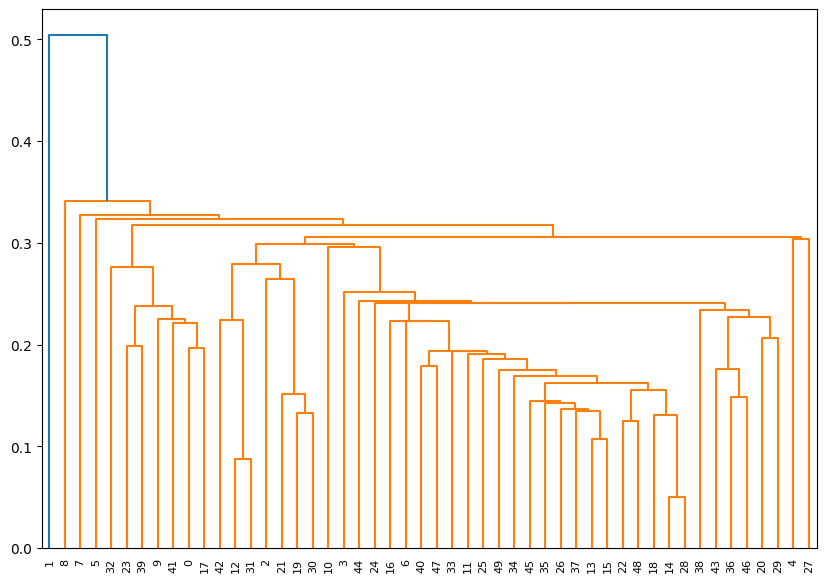

In [13]:
#create dendrogram
plt.figure(figsize=(10,7))
dendrogram = sch.dendrogram(sch.linkage(crime_norm, method='single'))

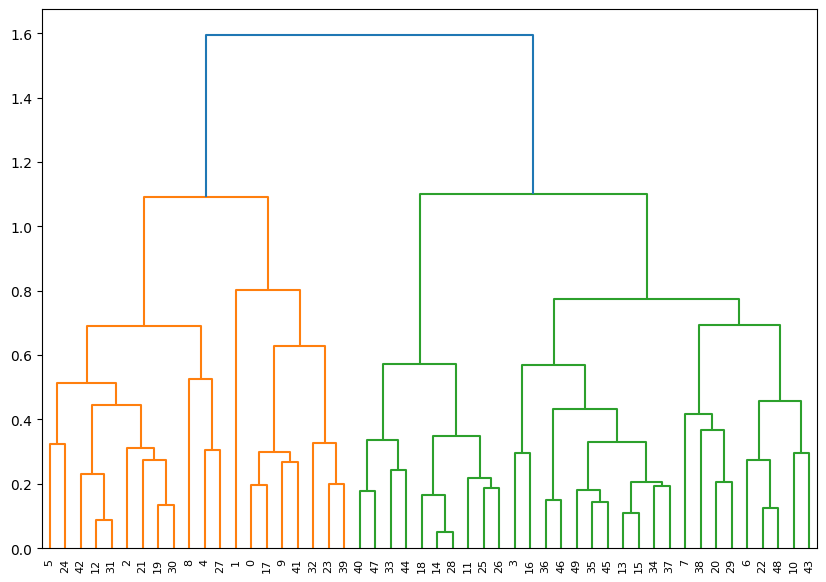

In [14]:
plt.figure(figsize=(10,7))
dendrogram = sch.dendrogram(sch.linkage(crime_norm, method='complete'))

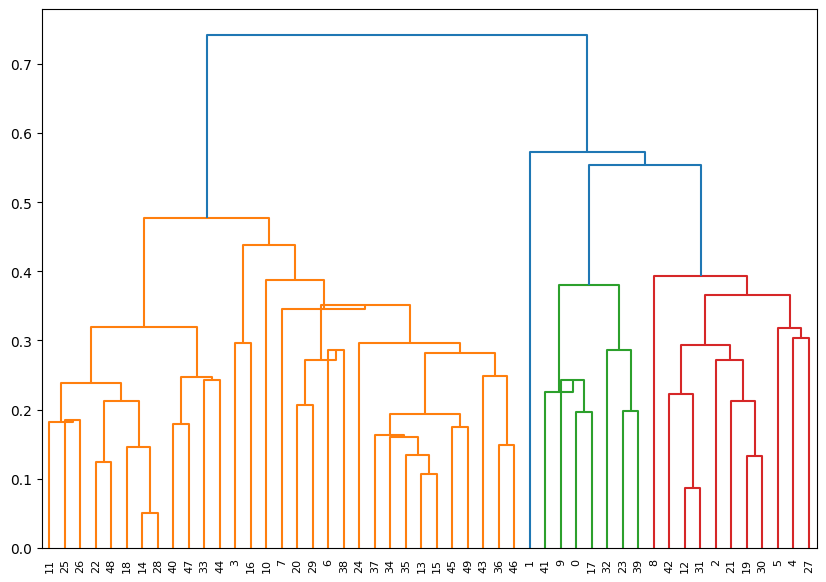

In [15]:
 plt.figure(figsize=(10,7))
dendrogram = sch.dendrogram(sch.linkage(crime_norm, method='centroid'))

In [16]:
# create clusters
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage ='complete')

In [17]:
hc.fit_predict(crime_norm)

array([3, 4, 1, 0, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 0, 3, 2, 1, 0, 1,
       0, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 0, 0], dtype=int64)

In [18]:
# save clusters for chart
y_hc = hc.fit_predict(crime_norm)
#Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [19]:
crime['h_clusterid'] = y_hc
crime

,city,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,4
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [20]:
crime2=crime.sort_values("h_clusterid")
crime2.iloc[:,[0,-1]]

,city,h_clusterid
49,Wyoming,0
20,Massachusetts,0
29,New Jersey,0
16,Kentucky,0
15,Kansas,0
34,Ohio,0
13,Indiana,0
35,Oklahoma,0
22,Minnesota,0
10,Hawaii,0


# k means

In [21]:
from sklearn.cluster import KMeans

In [22]:
# Normalization function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

In [23]:
# Normalized data frame (considering the numerical part of data)
crime_norm = norm_func(crime.iloc[:,1:])

In [26]:
TWSS = []
k = list(range(2, 9))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(crime_norm)
    TWSS.append(kmeans.inertia_)


Text(0, 0.5, 'total_within_SS')

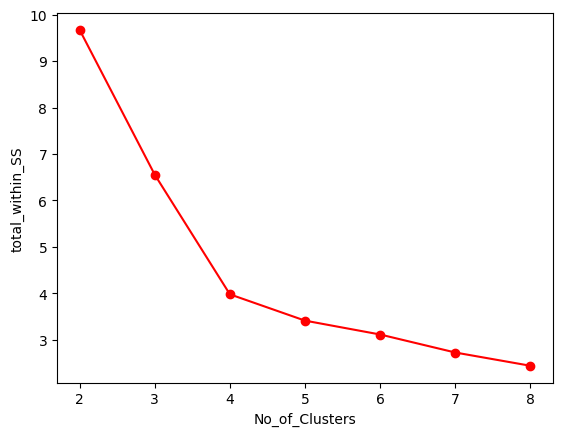

In [27]:
TWSS
# Scree plot
plt.plot(k, TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")

In [28]:
# Selecting 4 clusters from the above scree plot which is the optimum number ofclusters
model_kmeans = KMeans(n_clusters = 4)
model_kmeans.fit(crime_norm)


KMeans(n_clusters=4)

In [29]:
model_kmeans.labels_

array([2, 2, 1, 3, 1, 1, 3, 3, 1, 2, 3, 0, 1, 3, 0, 3, 3, 2, 0, 1, 3, 1,
       3, 2, 1, 0, 0, 1, 0, 3, 1, 1, 2, 0, 3, 3, 3, 3, 3, 2, 0, 2, 1, 3,
       0, 3, 3, 0, 3, 3])

In [30]:
model_kmeans.labels_ # getting the labels of clusters assigned to each row
mb = pd.Series(model_kmeans.labels_) # converting numpy array into pandas series object
crime['k_means_clust'] = mb # creating a new column and assigning it to newcolumn

In [31]:
crime.head()

,city,Murder,Assault,UrbanPop,Rape,h_clusterid,k_means_clust
0,Alabama,13.2,236,58,21.2,3,2
1,Alaska,10.0,263,48,44.5,4,2
2,Arizona,8.1,294,80,31.0,1,1
3,Arkansas,8.8,190,50,19.5,0,3
4,California,9.0,276,91,40.6,1,1


In [32]:
kmeans = KMeans(n_clusters=3,random_state=0)
predict=kmeans.fit_predict(crime_norm)

In [33]:
predict

array([1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 0, 2, 2, 1, 0, 1, 2, 1,
       2, 1, 1, 0, 0, 1, 0, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2,
       0, 2, 2, 0, 2, 2])

In [34]:
crime2=crime.sort_values("k_means_clust")
crime2.iloc[:,[0,-1]]

,city,k_means_clust
25,Montana,0
47,West Virginia,0
44,Vermont,0
28,New Hampshire,0
18,Maine,0
40,South Dakota,0
11,Idaho,0
26,Nebraska,0
33,North Dakota,0
14,Iowa,0


# DB SCAN

In [35]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [36]:
array=crime.iloc[:,1:].values
array

array([[ 13.2, 236. ,  58. ,  21.2,   3. ,   2. ],
       [ 10. , 263. ,  48. ,  44.5,   4. ,   2. ],
       [  8.1, 294. ,  80. ,  31. ,   1. ,   1. ],
       [  8.8, 190. ,  50. ,  19.5,   0. ,   3. ],
       [  9. , 276. ,  91. ,  40.6,   1. ,   1. ],
       [  7.9, 204. ,  78. ,  38.7,   1. ,   1. ],
       [  3.3, 110. ,  77. ,  11.1,   0. ,   3. ],
       [  5.9, 238. ,  72. ,  15.8,   0. ,   3. ],
       [ 15.4, 335. ,  80. ,  31.9,   1. ,   1. ],
       [ 17.4, 211. ,  60. ,  25.8,   3. ,   2. ],
       [  5.3,  46. ,  83. ,  20.2,   0. ,   3. ],
       [  2.6, 120. ,  54. ,  14.2,   2. ,   0. ],
       [ 10.4, 249. ,  83. ,  24. ,   1. ,   1. ],
       [  7.2, 113. ,  65. ,  21. ,   0. ,   3. ],
       [  2.2,  56. ,  57. ,  11.3,   2. ,   0. ],
       [  6. , 115. ,  66. ,  18. ,   0. ,   3. ],
       [  9.7, 109. ,  52. ,  16.3,   0. ,   3. ],
       [ 15.4, 249. ,  66. ,  22.2,   3. ,   2. ],
       [  2.1,  83. ,  51. ,   7.8,   2. ,   0. ],
       [ 11.3, 300. ,  67. ,  2

In [37]:
stscaler = StandardScaler()
X = stscaler.fit_transform((crime.iloc[:,1:]))
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116,  1.61867696,
         0.20412415],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392,  2.4889334 ,
         0.20412415],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626, -0.1218359 ,
        -0.64639313],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398, -0.99209233,
         1.05464142],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393, -0.1218359 ,
        -0.64639313],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137, -0.1218359 ,
        -0.64639313],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319, -0.99209233,
         1.05464142],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422, -0.99209233,
         1.05464142],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 , -0.1218359 ,
        -0.64639313],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293,  1.61867696,
         0.20412415],
       [-0.57702994, -1.51224105,  1.21848371, -0.

In [38]:
dbscan = DBSCAN(eps=2, min_samples=5)
dbscan.fit_predict(X)

array([ 0, -1,  1,  2,  1,  1,  2,  2,  1,  0,  2,  3,  1,  2,  3,  2,  2,
        0,  3,  1,  2,  1,  2,  0,  1,  3,  3,  1,  3,  2,  1,  1,  0,  3,
        2,  2,  2,  2,  2,  0,  3,  0,  1,  2,  3,  2,  2,  3,  2,  2],
      dtype=int64)

In [39]:
#Noisy samples are given the label -1.
dbscan.labels_

array([ 0, -1,  1,  2,  1,  1,  2,  2,  1,  0,  2,  3,  1,  2,  3,  2,  2,
        0,  3,  1,  2,  1,  2,  0,  1,  3,  3,  1,  3,  2,  1,  1,  0,  3,
        2,  2,  2,  2,  2,  0,  3,  0,  1,  2,  3,  2,  2,  3,  2,  2],
      dtype=int64)

In [40]:
DB=pd.DataFrame(dbscan.labels_,columns=['DB SCAN'])
DB

,DB SCAN
0,0
1,-1
2,1
3,2
4,1
5,1
6,2
7,2
8,1
9,0


In [41]:
clustered = pd.concat([crime,DB],axis=1)
clustered

,city,Murder,Assault,UrbanPop,Rape,h_clusterid,k_means_clust,DB SCAN
0,Alabama,13.2,236,58,21.2,3,2,0
1,Alaska,10.0,263,48,44.5,4,2,-1
2,Arizona,8.1,294,80,31.0,1,1,1
3,Arkansas,8.8,190,50,19.5,0,3,2
4,California,9.0,276,91,40.6,1,1,1
5,Colorado,7.9,204,78,38.7,1,1,1
6,Connecticut,3.3,110,77,11.1,0,3,2
7,Delaware,5.9,238,72,15.8,0,3,2
8,Florida,15.4,335,80,31.9,1,1,1
9,Georgia,17.4,211,60,25.8,3,2,0


In [42]:
clustered[clustered['DB SCAN']==-1]

,city,Murder,Assault,UrbanPop,Rape,h_clusterid,k_means_clust,DB SCAN
1,Alaska,10.0,263,48,44.5,4,2,-1


# Inferences:-

1)“Clust - 0” has low crime rate.
2) “Clust - 1” has high crime rate. There are 20 places among total 50 places have higher
crime rate